In [1]:
import matplotlib.pyplot as plt
import time
import pandas as pd
import numpy as np
import calendar


Hello, we will explore bikeshare data from three US cities. Let's do it! 

Choose your city to explore: Chicago = 1, New York =2, Washington = 3: 
2
You chose New york

Choose your month -- Jan = 1, Feb = 2, Mar = 3, Apr = 4, May = 5, June = 6, All = 7: 
7
You chose 'All'
Choose your day -- Mon = 0, Tues = 1, Wed = 2, Thur = 3, Fri = 4, Sat = 5, Sun = 6, All = 7: 
7
You chose 'All'

CALCULATING THE MOST FREQUENT TIMES OF TRAVEL...

6  76022
5  67015
4  58176
2  34741
3  32164
1  31882

The most common month: June


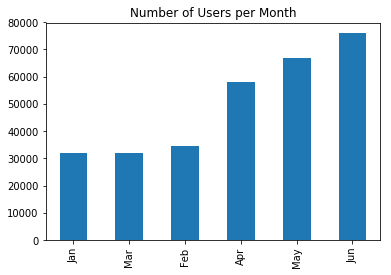


The most common day of the week:  Wednesday


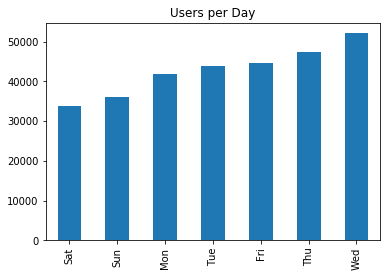


The most common start hour of the day:  17

Most common end hour of the day:  18

Earliest start hour: 0

Latest start hour 23

3       446
4       480
2       740
1      1287
5      1797
0      2398
23     4265
6      6618
22     6713
21     9120
10    13134
20    13184
7     13775
11    13946
12    16066
13    16686
14    17630
15    18455
9     19164
19    19611
16    21161
8     24581
18    28702
17    30041
Name: start hour, dtype: int64


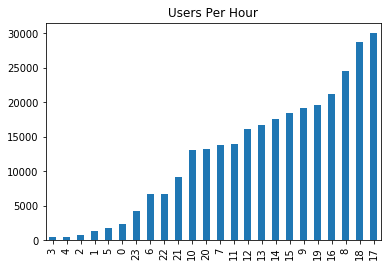


This took 3.3269522190093994 seconds.
----------------------------------------

CALCULATING THE MOST POPULAR STATIONS AND TRIP...

Most common start station:  Pershing Square North

Most common end station:  Pershing Square North

Most frequent combination of Start and End stations -- START: York St & Jay St, END: York St & Jay St 

This took 0.43754124641418457 seconds.
----------------------------------------

CALCULATING TRIP DURATION...

Total travel time: 74973 hours 40 minutes 48 seconds

Travel time average: 899.68416 seconds

Longest trip duration: 2155775 seconds

Shortest trip duration: 61 seconds


This took 0.029426097869873047 seconds.
----------------------------------------

CALCULATING USER STATS...

User type counts:

 Subscriber  269149
  Customer   30159

Percentage of users as subscribers: 89.92375746722439%

Percentage of users as customers: 10.076242532775602%



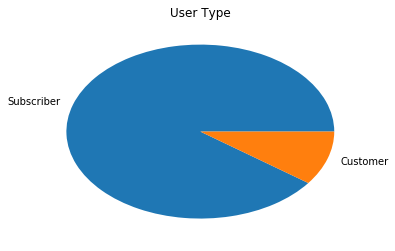

Gender counts:

  Male  204008
Female   66783

Percentage of users as males: 75.3378066479 percent

Percentage of users as females: 24.6621933521 percent



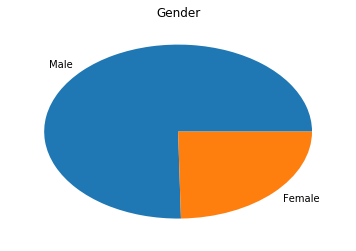


Female    Customer    1713
Female  Subscriber   64859
  Male    Customer    2652
  Male  Subscriber  200887

Most common birth year:  1989

Most recent birth year: 2001

Earliest birth year: 1885

This took 0.6004390716552734 seconds.
----------------------------------------

Would you like to restart? Enter Y or N.
n
Goodbye


In [2]:
class Bikeshare:
    print()
    print('Hello, we will explore bikeshare data from three US cities. Let\'s do it! \n')
    
    def __init__(self):
        self.city_data = { '1': 'chicago.csv',
                     '2': 'new_york_city.csv',
                      '3': 'washington.csv' }

        self.cities = {'Chicago':'1', 'New York': '2', 'Washington': '3'}
        self.months = {'January':'1', 'February':'2', 'March':'3', 'April':'4','May':'5', 'June':'6', 'All':'7'}
        self.days = {'Monday':'0', 'Tuesday':'1', 'Wednesday':'2', 'Thursday':'3', 
                         'Friday':'4', 'Saturday':'5', 'Sunday':'6', 'All':'7'}

    def filter_load_data(self):
        global city, month, day
        err_msg = 'Invalid, try again...'
        while True:
            city = input('Choose your city to explore: Chicago = 1, New York =2, Washington = 3: \n')
            if city in self.cities.values():
                city_name = [k for k,v in self.cities.items() if v == city]
                print('You chose', city_name[0].capitalize())
                print()
                break
            else:
                try:
                    print()
                    print(err_msg)

                except:
                    pass
        while True:
            month = input('Choose your month -- Jan = 1, Feb = 2, Mar = 3, Apr = 4, May = 5, June = 6, All = 7: \n').capitalize()
            if month not in self.months.values():
                    print(err_msg)
            else:
                try: 
                    if month != str(7):
                        print('You chose', calendar.month_name[int(month)])
                        print()
                    else:
                        print("You chose 'All'")
                    break
                except: 
                    print(err_msg)
        while True:
            day = input('Choose your day -- Mon = 0, Tues = 1, Wed = 2, Thur = 3, Fri = 4, Sat = 5, Sun = 6, All = 7: \n').capitalize()
            if day not in self.days.values():
                    print(err_msg)
            else:
                try: 
                    if day != str(7):
                        print('You chose', calendar.day_name[int(day)])
                    else: 
                        print("You chose 'All'")
                    break
                except: 
                    print(err_msg)
    
        month = int(month)
        day = int(day)
        
        # loads data file into a dataframe
        df = pd.read_csv(self.city_data[city])

        #change name of user column from 'Unnamed: 0' to 'User Id'
        column_rename = df.columns.values 
        column_rename[0] = 'User Id'
        df.columns = column_rename

        # convert the Start Time column to datetime
        df['Start Time'] = pd.to_datetime(df['Start Time'])
        df['End Time'] = pd.to_datetime(df['End Time'])

        # extracts month, day of the week, and hour from Start Time to create new columns
        df['month'] = df['Start Time'].dt.month
        df['day_of_week'] = df['Start Time'].dt.dayofweek
        df['start hour'] = df['Start Time'].dt.hour
        df['end hour'] = df['End Time'].dt.hour

        # filter by month if applicable
        if month != 7:
            # use the index of the months list to get the corresponding int
            months = list(range(1,8)) 
            month = months.index(month) + 1

            # filter by month to create the new dataframe
            df = df[df['month'].values == month]

        # filter by day of week if applicable
        if day != 7:
            # filter by day of week to create the new dataframe
            df = df[df['day_of_week'].values == day]

        return city, month, day, df 
    
    def stats(self, df):  
############################################### Time Stats ########################################################
        print(str('\nCalculating The Most Frequent Times of Travel...\n').upper())
        start_time = time.time()

        # Displays the most common month
        month_mode = df['month'].mode()[0]
        month_counts = df['month'].value_counts().reset_index()

        if month == 7:
            print(month_counts.to_string(header = None, index = None))
            print()
            print('The most common month:', calendar.month_name[month_mode])
            df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])
            month_counts = df['month'].value_counts(ascending=True)
            month_counts.plot(title='Number of Users per Month', kind='bar', legend = False)
            plt.show()

        # TO DO: display the most common day of week
        day_mode = df['day_of_week'].mode()[0]

        if day == 7:
            print()
            print('The most common day of the week: ', calendar.day_name[day_mode])
            df['day_of_week'] = df['day_of_week'].apply(lambda x: calendar.day_abbr[x])
            day_counts = df['day_of_week'].value_counts(ascending=True)
            day_counts.plot(title='Users per Day', kind='bar', legend = False)
            plt.show()

        # TO DO: display the most common start hour
        startHour_mode = df['start hour'].mode()[0]
        print()
        print('The most common start hour of the day: ', startHour_mode)
        print()
        endHour_mode = df['end hour'].mode()[0]
        print('Most common end hour of the day: ', endHour_mode)
        print()
        startHr_min = df['start hour'].min()
        print('Earliest start hour:', startHr_min)
        print()
        startHr_max = df['start hour'].max()
        print('Latest start hour', startHr_max)
        print()
        hour_counts = df['start hour'].value_counts(ascending=True)
        print(hour_counts)
        hour_counts.plot(x = 'hour', title='Users Per Hour', kind='bar', legend = False)
        plt.show()

        print("\nThis took %s seconds." % (time.time() - start_time))
        print('-'*40)

############################################### Station ########################################################
        print(str('\nCalculating The Most Popular Stations and Trip...\n').upper())
        start_time = time.time()

        # TO DO: display most commonly used start station
        start_station_mode = df['Start Station'].mode()[0]
        print('Most common start station: ', start_station_mode)

        # TO DO: display most commonly used end station
        end_station_mode = df['End Station'].mode()[0]
        print()
        print('Most common end station: ', end_station_mode)
        print()

        # TO DO: display most frequent combination of start station and end station trip
        loc_combo_mode = max(df.groupby(['Start Station', 'End Station']).size().index)
        print('Most frequent combination of Start and End stations -- START: %s, END: %s '  % (loc_combo_mode[0], loc_combo_mode[1]))

        print("\nThis took %s seconds." % (time.time() - start_time))
        print('-'*40)

############################################### Trip Duration ########################################################
        print(str('\nCalculating Trip Duration...\n').upper())
        start_time = time.time()

        # TO DO: display total travel time
        total_time = df['Trip Duration'].sum() 
        print('Total travel time: %s hours %s minutes %s seconds' % (total_time//3600, total_time%3600//60, total_time%3600%60))
        print()

        # TO DO: display mean travel time
        time_avg = df['Trip Duration'].mean()
        print('Travel time average: %s seconds' % (time_avg))
        print()

        #Displays maximum trip duration
        time_max = df['Trip Duration'].max()
        print('Longest trip duration: %s seconds' % (time_max))
        print()

        #Displays minimum trip duration
        time_min = df['Trip Duration'].min()
        print('Shortest trip duration: %s seconds' % (time_min))
        print()


        print("\nThis took %s seconds." % (time.time() - start_time))
        print('-'*40)

############################################ User Stats ########################################################
        print(str('\nCalculating User Stats...\n').upper())
        start_time = time.time()

        # TO DO: Display counts of user types 
        user_type = df['User Type'].value_counts().reset_index()
        print('User type counts:\n\n', user_type.to_string(header=None, index=None))
        print()
        user_type_counts = df['User Type'].value_counts()
        subscriber = df['User Type'].value_counts()[0]
        customer = df['User Type'].value_counts()[1]
        percent_subscriber = (subscriber/(subscriber + customer))*100
        percent_customer = (customer/(customer + subscriber))*100
        print('Percentage of users as subscribers: {}%'.format(percent_subscriber))
        print()
        print('Percentage of users as customers: {}%'.format(percent_customer))
        print()
        user_type_counts.plot(kind='pie', title='User Type').set_ylabel('')
        plt.show()

        # Displays gender counts
        try:
            gender = df['Gender'].value_counts().reset_index()
            print('Gender counts:\n\n ', gender.to_string(header=None, index=None))
            print()
            gender_counts = df['Gender'].value_counts()
            male = gender_counts[0]
            female = gender_counts[1]
            percentage_male = (male/(male + female))*100
            percentage_female = (female/(female + male))*100
            print('Percentage of users as males: %s percent' % (percentage_male))
            print()
            print('Percentage of users as females: %s percent' % (percentage_female))
            print()
            gender_counts.plot(kind='pie', title='Gender').set_ylabel('')
            plt.show()
            print()
            gender_userType = df.groupby(['Gender', 'User Type']).size().reset_index()
            print(gender_userType.to_string(header=None, index=None))
        except KeyError:
            print('Washington has no gender data')

        print()

        # Displays earliest, most recent, and most common year of birth
        try:
            birthYear_mode = df['Birth Year'].mode()[0]
            print('Most common birth year: ', int(birthYear_mode))
            print()
            mostRecent_birthYear = df['Birth Year'].max()
            print('Most recent birth year:', int(mostRecent_birthYear))
            print()
            earliest_birthYear = df['Birth Year'].min()
            print('Earliest birth year:', int(earliest_birthYear))
        except KeyError:
            print('Washington has no birth year data')

        print("\nThis took %s seconds." % (time.time() - start_time))
        print('-'*40)
            
def main():
    while True:
        city, month, day, df = Bikeshare().filter_load_data()
        Bikeshare().stats(df)
        
        while True:
            valid_responses = ['Y', 'N']
            restart = input('\nWould you like to restart? Enter Y or N.\n').capitalize()
            if restart not in valid_responses:
                print('Invalid input. Y or N?')
            elif restart == 'Y':
                city, month, day, df = Bikeshare().filter_load_data()
                Bikeshare().stats(df)
                
            elif restart != 'Y':
                #print('Bye!')
                #tts('Goodbye','goodbye')
                print('Goodbye')
                break
        break
            
if __name__ == "__main__":
	main()